In [5]:
import pandas as pd
from scipy.stats import pointbiserialr,spearmanr
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, recall_score
import numpy as np

In [10]:
dataset = pd.read_csv("diabetes.csv")
corr = dataset.corr()

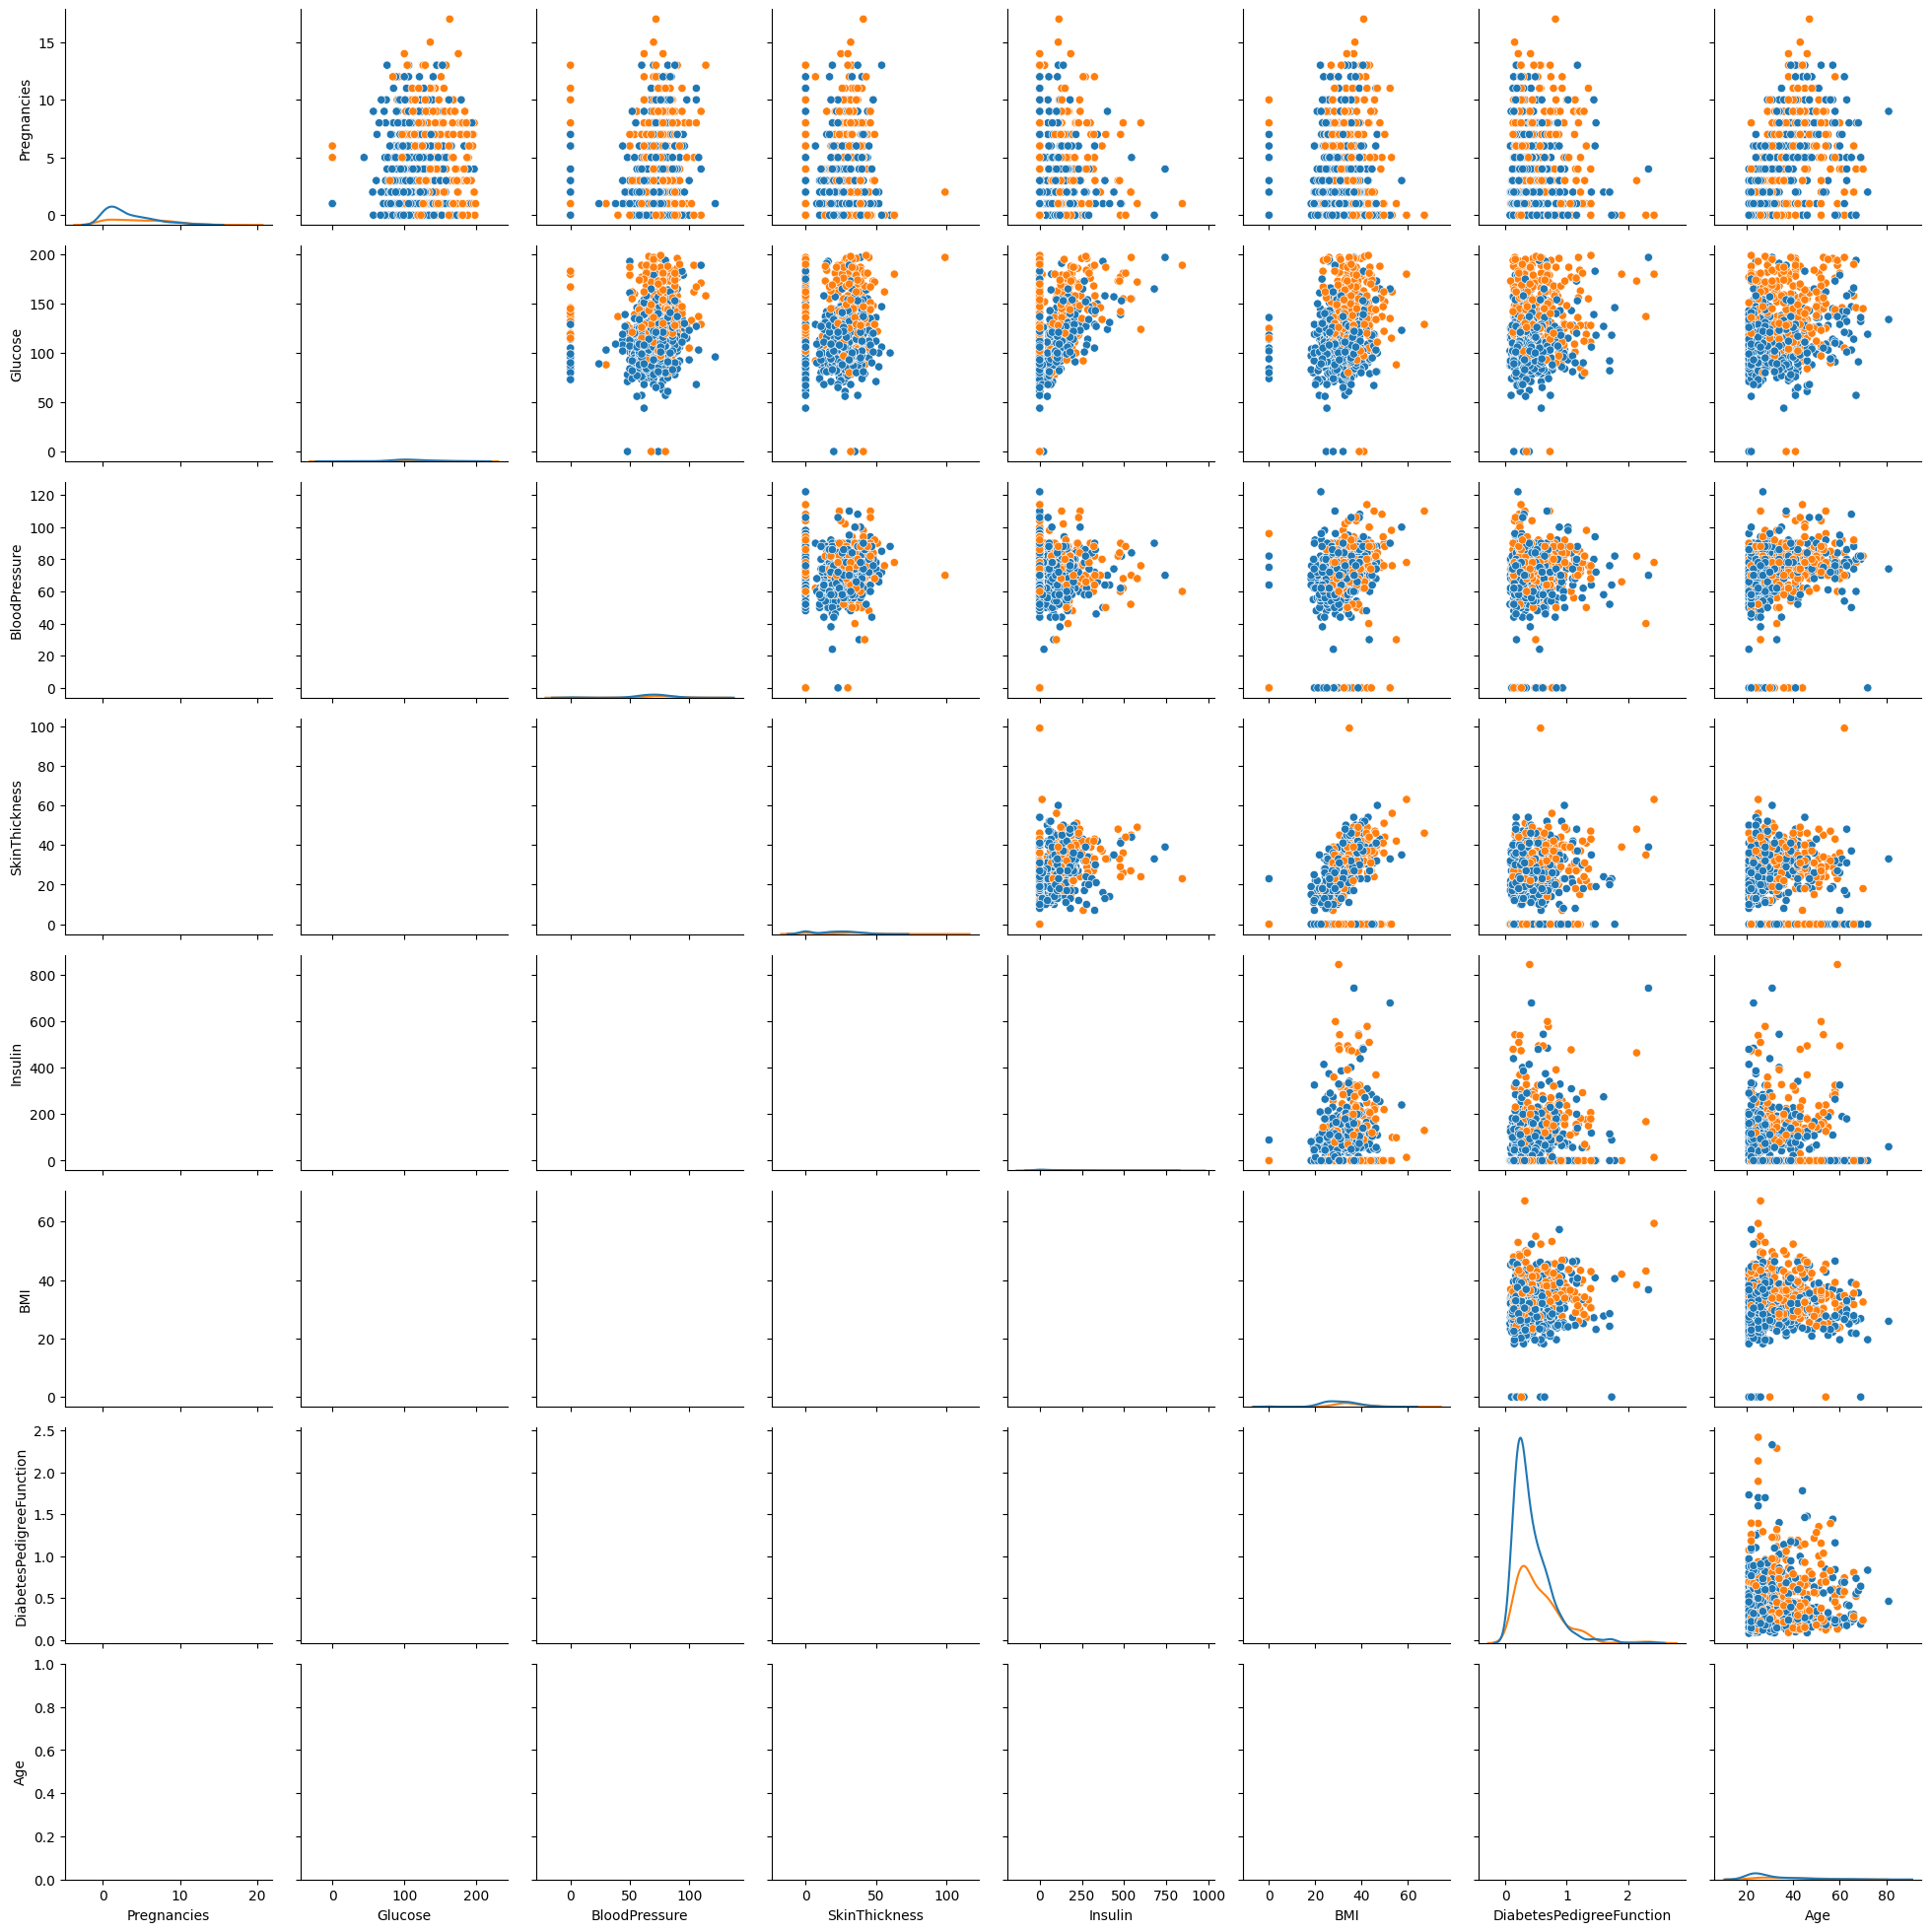

In [34]:
pl = sns.PairGrid(dataset, hue="Outcome", palette="tab10")
pl.map_upper(sns.scatterplot)
pl.map_diag(sns.kdeplot)

<Axes: >

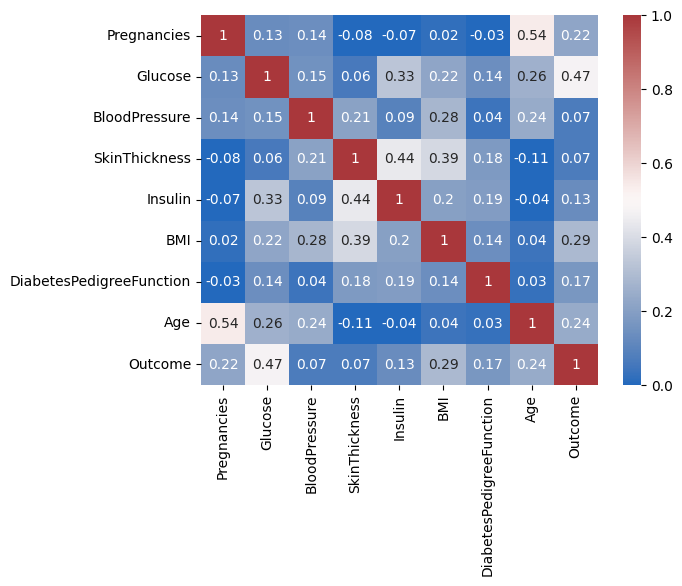

In [20]:
sns.heatmap(corr.round(2),annot=True,cmap="vlag",vmax=1,vmin=0)

<Axes: >

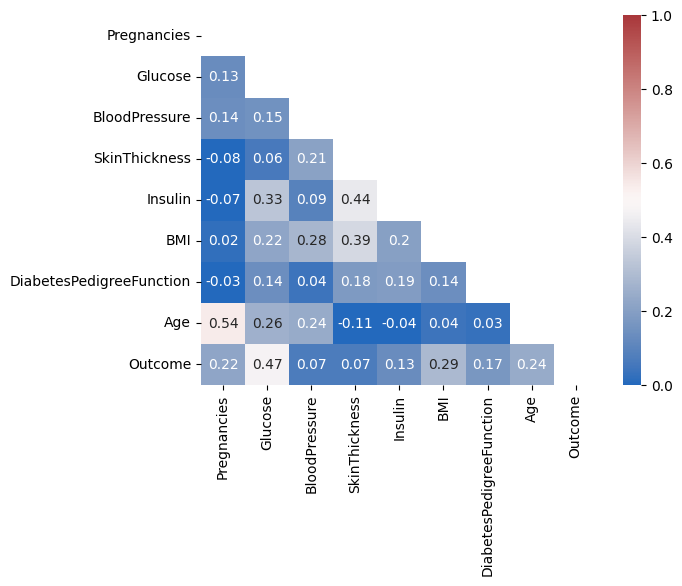

In [ ]:
matrix = dataset.corr().round(2)
make_bool = np.ones_like(matrix,dtype=bool)
make_mask = np.triu(make_bool)
# ones_like is the function to make the matrix turn off to True if the value of sel != 0 or False
sns.heatmap(matrix,cmap="vlag",vmax=1, vmin=0, mask=make_mask,annot=True)

# annot is use for show the value of each sel or not
# vmax is use to determine the max val of matrix, whereas vmin for the min Value
# cmap for the color, and mask will be showing all of matrix, which is false in mask matrix parameter 

In [ ]:
corr_preg = spearmanr(dataset['Pregnancies'],dataset['Outcome'])
corr_preg


In [16]:
# corr = pointbiserialr(dataset['Pregnancies'],dataset['Outcome'])
X  = dataset.iloc[:,:7].to_numpy()

y = dataset['Outcome'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

In [ ]:
Model2 = LogisticRegression(max_iter=300)
Model2.fit(X_train, y_train)


LogisticRegression(max_iter=300)

In [69]:
with open('model-diabetes.pkl',"wb") as file:
    pickle.dump(Model2,file)
    file.close()

In [20]:
y_pred = Model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
roc = roc_curve(y_pred,y_test)
print(f"roc = {roc}")
print(f"accuracy = {accuracy}")

roc = (array([0.        , 0.21929825, 1.        ]), array([0.  , 0.75, 1.  ]), array([inf,  1.,  0.]))
accuracy = 0.7727272727272727


In [3]:
sc = cross_val_score(Model2,X,y
                ,cv=10)
sc


NameError: name 'Model2' is not defined